##  Область работы 1 (библиотеки)

In [15]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sts
from scipy.stats import iqr, boxcox
from category_encoders import TargetEncoder

from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, validation_curve
from sklearn.model_selection import StratifiedShuffleSplit

from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler, Normalizer

from sklearn.preprocessing import OrdinalEncoder,LabelEncoder, OneHotEncoder, TargetEncoder
from sklearn.preprocessing import MinMaxScaler, PolynomialFeatures

from sklearn.preprocessing import PolynomialFeatures
from sklearn.compose import ColumnTransformer, make_column_transformer
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer


from sklearn.linear_model import Ridge, Lasso, LogisticRegression
from sklearn.metrics import f1_score, precision_score, recall_score, roc_auc_score
from sklearn.compose import TransformedTargetRegressor
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.model_selection import KFold, StratifiedKFold
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from sklearn.preprocessing import FunctionTransformer
from sklearn.ensemble import StackingClassifier
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingClassifier

from scipy.stats import spearmanr
from scipy.spatial.distance import squareform
from scipy.cluster import hierarchy

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.inspection import permutation_importance
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from IPython.display import display

from sklearn.datasets import load_breast_cancer


from sklearn.feature_selection import VarianceThreshold
from sklearn.feature_selection import SelectPercentile
from sklearn.feature_selection  import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import SequentialFeatureSelector
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import SelectFpr
from sklearn.feature_selection import SelectFdr
from sklearn.feature_selection import SelectFwe
from sklearn.feature_selection import f_regression


#sklearn.set_config(transform_output="pandas")

#print(sklearn.__version__)

In [16]:
# Данный блок(и) НЕ выполняются преподавателем в области 2
# блок(и) предназначены для поиска лучшей модели
# 
# Запрещается размещать данные блоки за пределами обасти 2
# Все блоки данной области должны быть выполнены
#
# Путь к тренировочному набору
# 

path_train = 'train_house_С.csv' # содержит только имя файла, без имен папок !!!

In [17]:
df = pd.read_csv(path_train)
df.head(3)

,price,0,1,2,3,4,5,6,7,8,...,19,20,21,22,23,24,25,26,27,28
0,3605000,1.307431,0.024120,0.0,-0.070044,-0.223185,0.809239,-1.308863,-0.734539,-0.929397,...,-0.991672,-0.263991,-0.141322,-1.599013,-0.570187,-1.528627,0.780013,-0.465315,0.405623,-0.679063
1,5215000,-0.478408,-0.024866,0.0,-0.126718,-0.223185,-0.520499,0.047278,1.361397,0.224410,...,-1.104034,-0.263991,-0.141322,0.701118,-0.570187,-1.324398,0.711996,2.149083,0.405623,-0.679063
2,7700000,3.093270,1.346730,0.0,0.666712,0.624632,-0.242150,1.403419,-0.734539,2.532024,...,-1.340582,1.791369,3.136137,1.512364,1.421812,0.698373,0.311803,-0.465315,0.405623,-0.679063


In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 408 entries, 0 to 407
Data columns (total 30 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   price   408 non-null    int64  
 1   0       408 non-null    float64
 2   1       408 non-null    float64
 3   2       408 non-null    float64
 4   3       408 non-null    float64
 5   4       408 non-null    float64
 6   5       408 non-null    float64
 7   6       408 non-null    float64
 8   7       408 non-null    float64
 9   8       408 non-null    float64
 10  9       408 non-null    float64
 11  10      408 non-null    float64
 12  11      408 non-null    float64
 13  12      408 non-null    float64
 14  13      408 non-null    float64
 15  14      408 non-null    float64
 16  15      408 non-null    float64
 17  16      408 non-null    float64
 18  17      408 non-null    float64
 19  18      408 non-null    float64
 20  19      408 non-null    float64
 21  20      408 non-null    float64
 22  21

<Axes: >

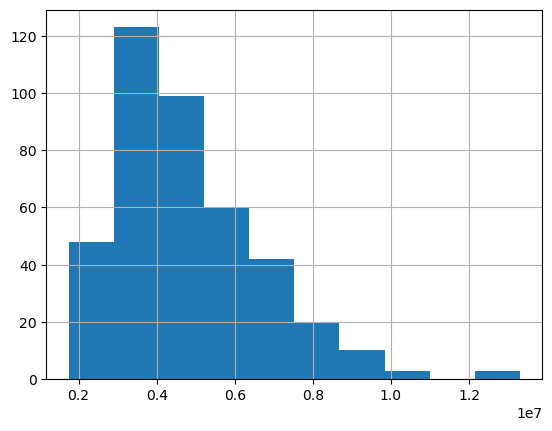

In [21]:
df.price.hist()

In [22]:
X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price', '1']), df.price,
                                                    test_size=0.3)

In [23]:
X_train

,0,2,3,4,5,6,7,8,9,10,...,19,20,21,22,23,24,25,26,27,28
108,-0.478408,0.0,-0.126718,-0.223185,-0.841835,0.047278,-0.734539,0.224410,2.460741,-0.091662,...,-0.529523,-0.263991,-0.141322,0.499041,-0.570187,0.879027,1.276759,-0.465315,-2.465344,-0.679063
270,1.307431,0.0,0.440018,-0.223185,0.015854,-1.308863,-0.734539,-0.929397,0.626157,-0.091662,...,-0.725264,-0.263991,-0.141322,-0.318163,-0.570187,-1.263276,-1.542411,-0.465315,0.405623,-0.679063
243,-0.478408,0.0,-0.126718,-0.223185,1.397765,0.047278,1.361397,-0.929397,-0.764578,-1.406286,...,1.171523,-0.263991,-0.141322,-0.964781,-0.570187,-0.975631,-1.049736,-0.465315,0.405623,1.472618
69,-0.478408,0.0,0.071640,-0.223185,0.263842,1.403419,-0.734539,0.224410,-0.260101,-0.091662,...,-1.605895,-0.263991,-0.141322,1.368188,-0.570187,-1.220225,1.489097,-0.465315,0.405623,1.472618
273,-0.478408,0.0,-0.126718,-0.223185,-1.096984,0.047278,1.361397,1.378217,-0.425437,1.222962,...,-1.127653,-0.263991,-0.141322,-1.296529,-0.570187,0.174153,0.776825,-0.465315,0.405623,-0.679063
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
16,-0.478408,0.0,-0.126718,-0.223185,-0.746374,0.047278,1.361397,0.224410,-0.754103,1.222962,...,-0.954886,-0.263991,-0.141322,-0.470506,-0.570187,-0.851624,0.371794,2.149083,0.405623,1.472618
74,-0.478408,0.0,0.666712,0.200724,-0.264987,2.759560,-0.734539,0.224410,-1.267592,-0.091662,...,1.469877,3.846729,-0.141322,0.615122,1.421812,1.042775,1.102515,-0.465315,0.405623,-0.679063
195,1.307431,0.0,-1.373537,-0.223185,-0.630635,-1.308863,1.361397,-0.929397,0.803325,-1.406286,...,-0.002090,-0.263991,-0.141322,-0.903826,-0.570187,0.580775,0.163127,2.149083,0.405623,-0.679063
352,-0.478408,0.0,3.749754,-0.223185,-0.328652,1.403419,1.361397,0.224410,-0.310618,-0.091662,...,0.001543,-0.263991,-0.141322,-1.158097,-0.570187,-1.075337,-0.043538,-0.465315,0.405623,-0.679063


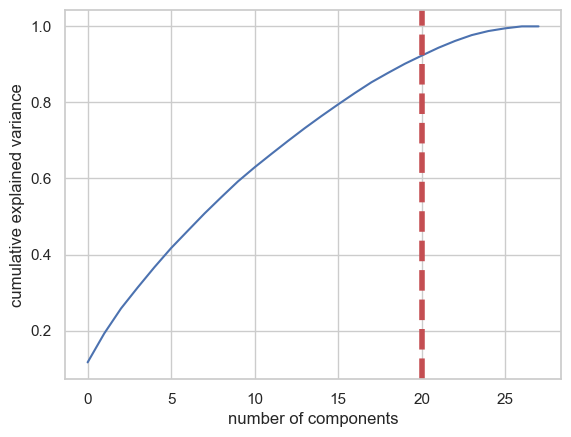

None

In [24]:
from sklearn.decomposition import PCA
pca_test = PCA(n_components=28)
pca_test.fit(X_train)
sns.set(style='whitegrid')
plt.plot(np.cumsum(pca_test.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.axvline(linewidth=4, color='r', linestyle = '--', x=20, ymin=0, ymax=1)
display(plt.show());

In [25]:
forest = RandomForestRegressor(n_estimators=500, random_state=42)
forest.fit(X_train, y_train)
y_pred_train = forest.predict(X_train)
y_pred = forest.predict(X_test)
print("Accuracy on train data: {:.2f}".format(forest.score(X_train, y_train)))
print("Accuracy on test data: {:.2f}".format(forest.score(X_test, y_test)))


plt.show();

Accuracy on train data: 0.94
Accuracy on test data: 0.58


,mean,std
19,0.040047,0.027885
22,0.040746,0.031141
28,0.045534,0.050862
4,0.191080,0.178015
13,0.308665,0.137519


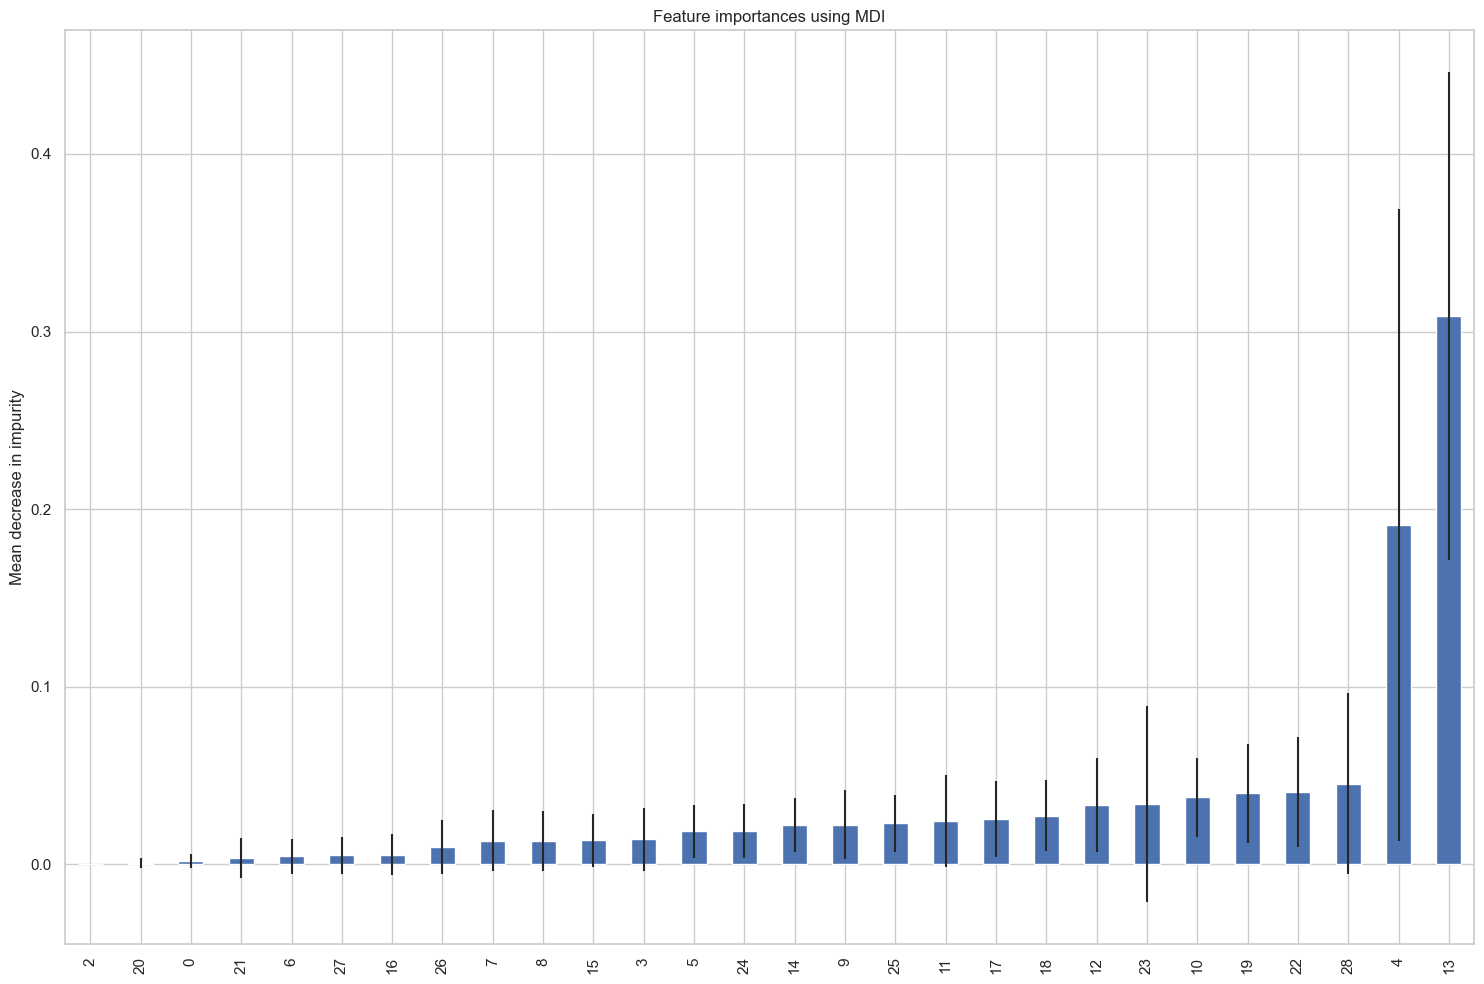

In [26]:
feature_names = X_train.columns
forest_importances = pd.DataFrame(forest.feature_importances_, index=feature_names, columns =['mean'])
forest_importances['std'] = np.std([tree.feature_importances_ for tree in forest.estimators_], axis=0)

sort_forest = forest_importances.sort_values(by='mean')


fig, ax = plt.subplots(figsize=(15,10))
col = sort_forest['mean']
yerr = sort_forest['std']
col.plot.bar(yerr=yerr, ax=ax)
ax.set_title("Feature importances using MDI")
ax.set_ylabel("Mean decrease in impurity")
fig.tight_layout()

display(sort_forest.tail(5))

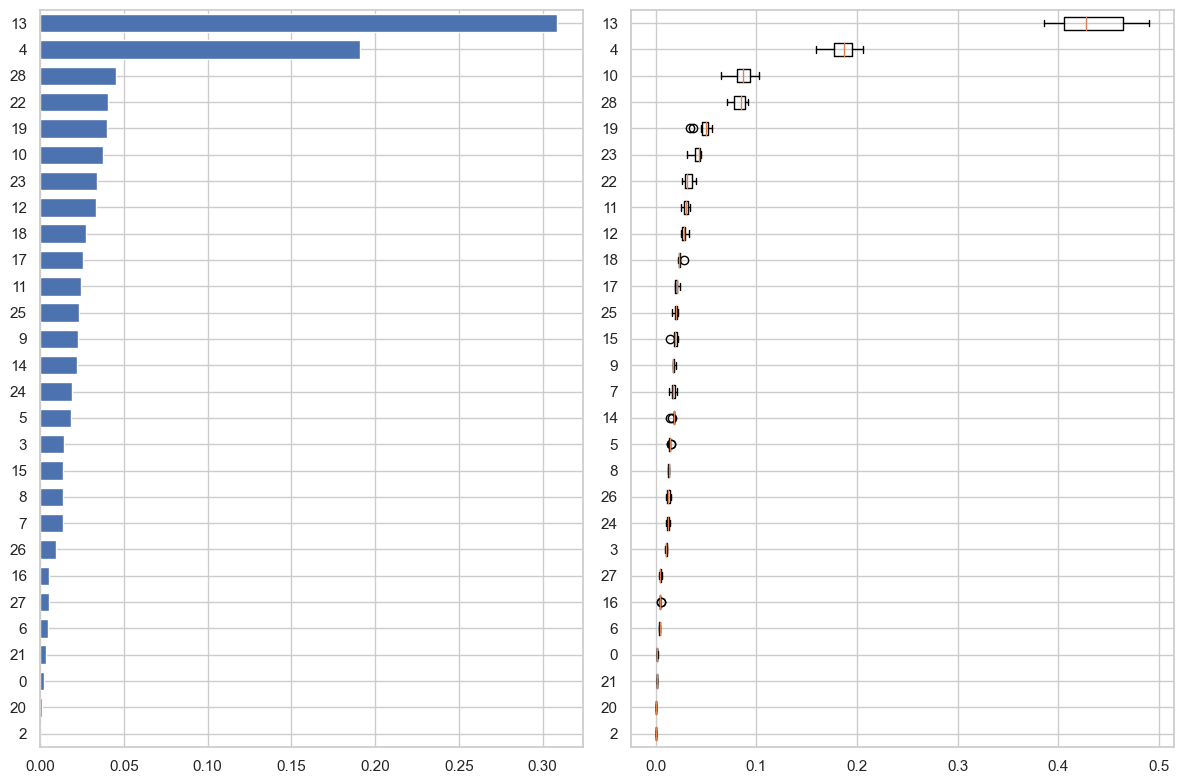

In [27]:
from sklearn.inspection import permutation_importance

result = permutation_importance(forest, X_train, y_train, n_repeats=10, random_state=42)

perm_sorted_idx = result.importances_mean.argsort()
tree_importance_sorted_idx = np.argsort(forest.feature_importances_)
tree_indices = np.arange(0, len(forest.feature_importances_)) + 0.5

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 8))

ax1.barh(tree_indices, forest.feature_importances_[tree_importance_sorted_idx], height=0.7)
ax1.set_yticks(tree_indices)
ax1.set_yticklabels(X_train.columns[tree_importance_sorted_idx])
ax1.set_ylim((0, len(forest.feature_importances_)))
ax2.boxplot(
    result.importances[perm_sorted_idx].T,
    vert=False,
    labels=X_train.columns[perm_sorted_idx],
)
fig.tight_layout()
plt.show()

In [105]:
from sklearn.feature_selection  import RFE

for i in range(10, 30):
    rfe_select = RFE(RandomForestRegressor(n_estimators=300),
                 n_features_to_select=i)
    
    mape_train = []
    mape_test = []
    
    for i in range(3):
        
        X_train, X_test, y_train, y_test = train_test_split(df.drop(columns = ['price']), df.price,
                                                    test_size=0.3)
        

        rfe_select.fit(X_train, y_train)

        selected_features = X_train.columns[rfe_select.support_]
        selected_features

        forest = RandomForestRegressor(n_estimators=500)
        forest.fit(X_train[selected_features], y_train)
        
        y_pred_train = forest.predict(X_train[selected_features])
        y_pred = forest.predict(X_test[selected_features])
        
        mape_train_i = np.mean(np.abs((y_train - y_pred_train) / y_train)) * 100
        mape_test_i = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
        
        mape_train.append(mape_train_i)
        mape_test.append(mape_test_i)
    
    
    
    
    print("on train data: {:.2f}".format(np.mean(np.array(mape_train))))
    print("on test data: {:.2f}".format(np.mean(np.array(mape_test))))
    print(selected_features)
    print('#################################################################################')

# # визуализируем отобранные признаки:
# mask = rfe_select.get_support()
# plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
# plt.yticks([])
# plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
# plt.xlabel("Индекс признака");

# mask = rfe_select.get_support()[:30]
# plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.2)
# plt.yticks([])
# plt.gca().xaxis.set_major_locator(plt.MultipleLocator(1))
# plt.xlabel("Индекс признака");

on train data: 8.01
on test data: 23.86
Index(['2', '3', '4', '6', '7', '13', '14', '15', '25', '26'], dtype='object')
#################################################################################
on train data: 7.61
on test data: 22.84
Index(['2', '3', '4', '6', '10', '11', '13', '16', '17', '25', '26'], dtype='object')
#################################################################################
on train data: 7.51
on test data: 21.95
Index(['2', '3', '4', '6', '7', '10', '14', '15', '16', '18', '19', '26'], dtype='object')
#################################################################################
on train data: 7.36
on test data: 20.95
Index(['2', '3', '4', '6', '10', '11', '13', '14', '16', '18', '22', '25',
       '26'],
      dtype='object')
#################################################################################
on train data: 7.53
on test data: 21.48
Index(['2', '3', '4', '6', '10', '14', '15', '16', '18', '19', '22', '25',
       '26', '27'],
      dtyp

array(['0', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '13',
       '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24',
       '25', '26', '27', '28'], dtype=object)

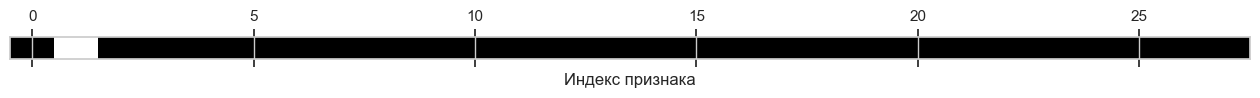

In [29]:


ths = (.9 * (1 - .9))
cancer_var = VarianceThreshold(threshold = ths)
cancer_var.fit_transform(X_train)
mask = cancer_var.get_support()


plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака")
cancer_var.get_support().sum()
a1 = cancer_var.get_feature_names_out()
a1

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:112: UserWarning: Features [1] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\sklearn\feature_selection\_univariate_selection.py:113: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


array(['0', '3', '4', '8', '10', '12', '13', '15', '21', '23', '28'],
      dtype=object)

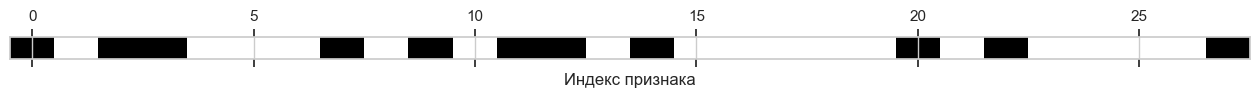

In [30]:
select_pct = SelectPercentile(percentile=40)
select_pct.fit(X_train, y_train)
# преобразовываем обучающий набор
X_train_selected = select_pct.transform(X_train)

mask4 = select_pct.get_support()
plt.matshow( mask4.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.xlabel("Индекс признака");
a2 = select_pct.get_feature_names_out()
a2

array(['4', '6', '7', '8', '10', '11', '13', '15', '16', '20', '23', '26',
       '27', '28'], dtype=object)

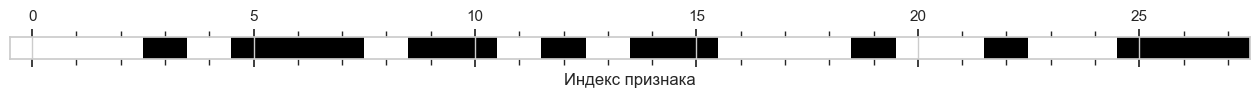

In [31]:
rfe_select = RFE(Lasso())

rfe_select.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask3 = rfe_select.get_support()
plt.matshow( mask3.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
mask3.sum()
a3 = rfe_select.get_feature_names_out()
a3

array(['4', '8', '11', '13', '15', '23', '28'], dtype=object)

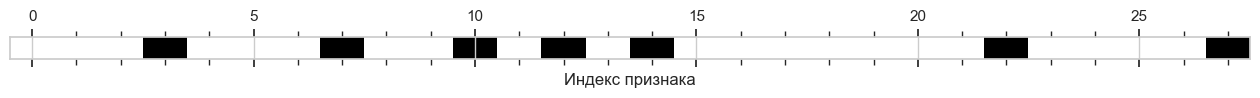

In [32]:
kbest = SelectKBest(f_regression, k=7)

kbest.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask2 = kbest.get_support()
plt.matshow( mask2.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
mask2.sum()
a4 = kbest.get_feature_names_out()
a4

array(['4', '6', '8', '10', '11', '13', '15', '21', '23', '26', '27',
       '28'], dtype=object)

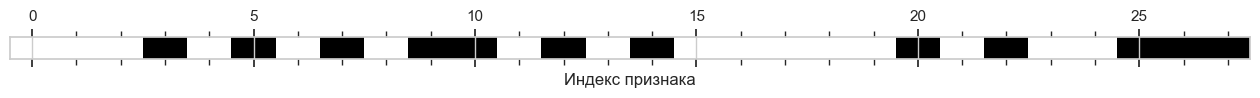

In [40]:
fwe = SelectFwe(f_regression, alpha = 0.01)

fwe.fit(X_train, y_train)


# визуализируем отобранные признаки:
mask1 = fwe.get_support()
plt.matshow( mask1.reshape(1,-1), cmap = 'gray_r', aspect=0.5)
plt.yticks([])
plt.gca().xaxis.set_minor_locator(plt.MultipleLocator(1))
plt.xlabel("Индекс признака");
mask1.sum()
a5 = fwe.get_feature_names_out()
a5

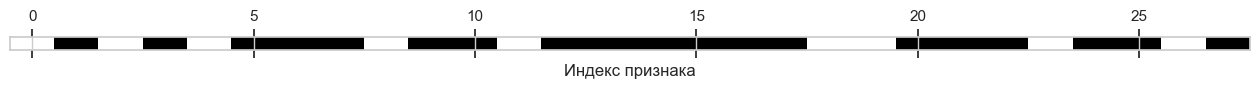

array(['2', '4', '6', '7', '8', '10', '11', '13', '14', '15', '16', '17',
       '18', '21', '22', '23', '25', '26', '28'], dtype=object)

In [34]:
select_f = SequentialFeatureSelector(
             RandomForestRegressor(n_estimators=100, random_state=42, n_jobs = -1),
             n_features_to_select=19, 
             direction="forward")

select_f.fit(X_train, y_train)
# визуализируем отобранные признаки:
mask = select_f.get_support()
plt.matshow( mask.reshape(1,-1), cmap = 'gray_r', aspect=0.3)
plt.yticks([])
plt.xlabel("Индекс признака");
plt.show();

a6 = select_f.get_feature_names_out()
a6

In [37]:
S = np.concatenate([a1,a2,a3,a4,a5,a6])

In [41]:
impf = pd.Series(S).value_counts().iloc[:10].index.to_list()
impf

['4', '28', '23', '15', '8', '13', '10', '11', '26', '21']

## RF

In [42]:
#COLUMN TRANSFORMER

impf = pd.Series(S).value_counts().iloc[:10].index.to_list()

num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])


CT = ColumnTransformer([
        ("num", num_transformer, impf)
        ], remainder='drop').set_output(transform='pandas')

CT.fit(X_train) 
transformed = CT.transform(X_train) 

feature_names = CT.get_feature_names_out()
feature_names

array(['num__4', 'num__28', 'num__23', 'num__15', 'num__8', 'num__13',
       'num__10', 'num__11', 'num__26', 'num__21'], dtype=object)

In [43]:
pipe_RF = Pipeline([
    ('preprocessing', CT),
    ('classifier', RandomForestRegressor())
])

In [48]:
kfold = KFold(n_splits=20, shuffle=True)

param_grid = {
    'classifier__criterion': ['poisson', 'absolute_error'],
    'classifier__max_depth': [None, 10, 20],
    'classifier__min_samples_split': [2, 5, 10],
    'classifier__min_samples_leaf': [1, 2, 4],
    'classifier__max_features': ['auto', 'sqrt', 'log2'],
    'preprocessing__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
}

In [49]:
grid = GridSearchCV(pipe_RF, param_grid, cv = kfold, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid.fit(X_train, y_train)
grid  

C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py:425: FitFailedWarning: 
3240 fits failed out of a total of 9720.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
2156 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\sklearn\model_selection\_validation.py", line 729, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\sklearn\base.py", line 1152, in wrapper
    return fit_method(estimator, *args, **kwargs)
  File "C:\Users\Acer\AppData\Roaming\Python\Python310\site-packages\sklearn\pipeline.py", line 427, in fit
 

GridSearchCV(cv=KFold(n_splits=20, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['4',
                                                                          '28',
                                                                          '23',
                                                                          '15',
                                                                          '8',
                                                                          '13',
                                                                          '10',
                                                                          '11',
                                                                          '26',
                                                                          '21'])])),
                                       ('classifier',
                                        RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'classifier__criterion': ['poisson', 'absolute_error'],
                         'classifier__max_depth': [None, 10, 20],
                         'classifier__max_features': ['auto', 'sqrt', 'log2'],
                         'classifier__min_samples_leaf': [1, 2, 4],
                         'classifier__min_samples_split': [2, 5, 10],
                         'preprocessing__num__scaler': [StandardScaler(),
                                                        MinMaxScaler(),
                                                        RobustScaler()]},
             scoring='neg_mean_absolute_percentage_error')

In [50]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,390,288,402,294,322,456,474,451,316,374,...,422,423,424,425,426,427,428,429,430,431
mean_fit_time,0.301868,0.271761,0.26781,0.272786,0.274112,0.264459,0.292616,0.26871,0.275812,0.282463,...,0.010752,0.006101,0.005053,0.010051,0.007153,0.007654,0.011257,0.007927,0.007278,0.010203
std_fit_time,0.008336,0.00465,0.005967,0.005191,0.007209,0.002783,0.010412,0.001459,0.008673,0.01617,...,0.002567,0.001869,0.002135,0.002033,0.001142,0.00181,0.004135,0.001227,0.001454,0.001134
mean_score_time,0.015754,0.015854,0.015653,0.015703,0.015453,0.016504,0.017354,0.015603,0.015854,0.017004,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
std_score_time,0.00109,0.000853,0.000572,0.001616,0.00074,0.0005,0.002851,0.000735,0.000792,0.002847,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
param_classifier__criterion,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,...,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error,absolute_error
param_classifier__max_depth,10,None,10,None,None,20,20,20,None,10,...,20,20,20,20,20,20,20,20,20,20
param_classifier__max_features,log2,sqrt,log2,sqrt,log2,sqrt,log2,sqrt,log2,sqrt,...,auto,auto,auto,auto,auto,auto,auto,auto,auto,auto
param_classifier__min_samples_leaf,2,4,4,4,4,4,2,4,4,4,...,2,4,4,4,4,4,4,4,4,4
param_classifier__min_samples_split,5,2,10,10,10,10,10,2,2,5,...,10,2,2,2,5,5,5,10,10,10
param_preprocessing__num__scaler,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),...,RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler(),StandardScaler(),MinMaxScaler(),RobustScaler()


<Axes: >

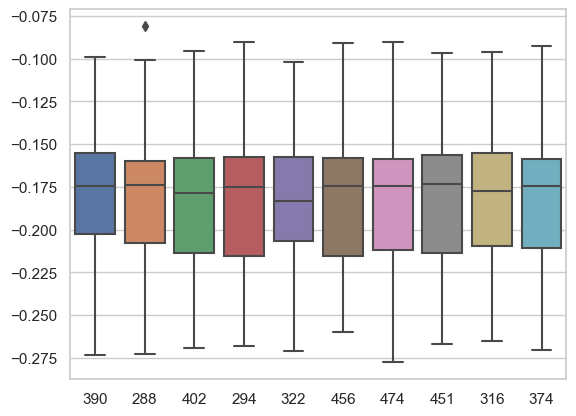

In [51]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl)

In [52]:
#COLUMN TRANSFORMER

impf = pd.Series(S).value_counts().iloc[:10].index.to_list()

num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])

#MODEL 

CT_rf = ColumnTransformer([
        ("num", num_transformer, impf)
        ], remainder='drop').set_output(transform='pandas')


pipe_RF_finale = Pipeline([('preprocessing', CT_rf),
                    ('classifier', RandomForestRegressor(criterion='absolute_error', max_depth=10, max_features='log2',
                                                          min_samples_leaf = 2, min_samples_split=5, n_estimators=500))])
pipe_RF_finale.fit(X_train, y_train)

pipe_RF_finale

Pipeline(steps=[('preprocessing',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['4', '28', '23', '15', '8',
                                                   '13', '10', '11', '26',
                                                   '21'])])),
                ('classifier',
                 RandomForestRegressor(criterion='absolute_error', max_depth=10,
                                       max_features='log2', min_samples_leaf=2,
                                       min_samples_split=5,
                                       n_estimators=500))])

## KNN

In [53]:
#COLUMN TRANSFORMER

impf = pd.Series(S).value_counts().iloc[:10].index.to_list()

num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])


CT = ColumnTransformer([
        ("num", num_transformer, impf)
        ], remainder='drop').set_output(transform='pandas')

CT

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['4', '28', '23', '15', '8', '13', '10', '11',
                                  '26', '21'])])

In [54]:
pipe_knn = Pipeline([
    ('preprocessing', CT),
    ('classifier', KNeighborsRegressor())
])

In [55]:
kfold = KFold(n_splits=5, shuffle=True, random_state=15)

param_grid = [
    {'classifier': [KNeighborsClassifier()],
     'classifier__n_neighbors': np.arange(5,50),
     'classifier__weights':['uniform','distance'],
     'classifier__p': np.arange(1,3),
     'preprocessing__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
}]


In [56]:
scoring = 'neg_mean_absolute_percentage_error'
grid = GridSearchCV(pipe_knn, n_jobs=-1, param_grid=param_grid, scoring=scoring, cv = kfold)
grid.fit(X_train, y_train)

GridSearchCV(cv=KFold(n_splits=5, random_state=15, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['4',
                                                                          '28',
                                                                          '23',
                                                                          '15',
                                                                          '8',
                                                                          '13',
                                                                          '10',
                                                                          '11',
                                                                          '26',
                                                                          '21'])])),
                                       ('classifier', KNeighborsRegressor())]),
             n_jobs=-1,
             param_grid=[{'classifier': [KNeighborsClassifier()],
                          'clas..._neighbors': array([ 5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21,
       22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34, 35, 36, 37, 38,
       39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49]),
                          'classifier__p': array([1, 2]),
                          'classifier__weights': ['uniform', 'distance'],
                          'preprocessing__num__scaler': [StandardScaler(),
                                                         MinMaxScaler(),
                                                         RobustScaler()]}],
             scoring='neg_mean_absolute_percentage_error')

In [57]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,189,201,297,309,177,213,321,393,417,405,...,55,85,115,37,91,79,60,67,61,49
mean_fit_time,0.009202,0.008602,0.009602,0.008802,0.009602,0.009087,0.009002,0.008602,0.009602,0.009202,...,0.007002,0.011002,0.008504,0.008602,0.009602,0.008802,0.017204,0.011803,0.011203,0.010602
std_fit_time,0.0004,0.00049,0.001744,0.001167,0.00049,0.000655,0.000894,0.00049,0.001357,0.0004,...,0.001674,0.001789,0.000447,0.00049,0.0008,0.001166,0.012026,0.003251,0.004957,0.003721
mean_score_time,0.011803,0.011803,0.012003,0.012002,0.012202,0.012802,0.012003,0.012203,0.012603,0.012403,...,0.007002,0.009602,0.008402,0.007601,0.009402,0.007802,0.011603,0.011002,0.010203,0.008602
std_score_time,0.0004,0.0004,0.0,0.0,0.000748,0.00194,0.0,0.000748,0.0008,0.00049,...,0.00155,0.0012,0.0008,0.00049,0.0028,0.0004,0.004319,0.002967,0.002316,0.00049
param_classifier,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),...,KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier(),KNeighborsClassifier()
param_classifier__n_neighbors,20,21,29,30,19,22,31,37,39,38,...,9,12,14,8,12,11,10,10,10,9
param_classifier__p,2,2,2,2,2,2,2,2,2,2,...,2,1,2,1,2,2,1,2,1,1
param_classifier__weights,distance,distance,distance,distance,distance,distance,distance,distance,distance,distance,...,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform,uniform
param_preprocessing__num__scaler,StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),StandardScaler(),...,MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),MinMaxScaler()
params,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...",...,"{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi...","{'classifier': KNeighborsClassifier(), 'classi..."


<Axes: >

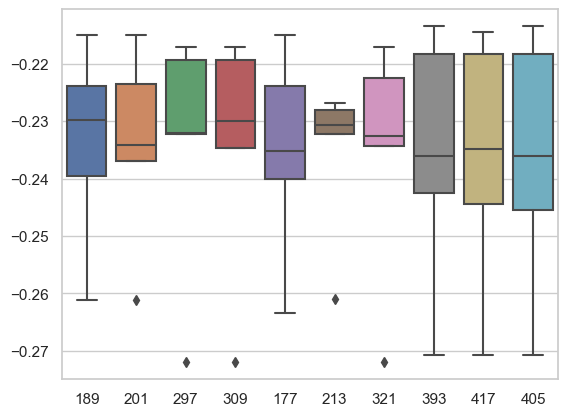

In [58]:
mask = grid_result.index[grid_result.index.str.endswith("_test_score")][:-3]
tabl = grid_result.loc[mask].iloc[:,:10]
sns.boxplot(data=tabl)

## SVR

In [59]:
impf = pd.Series(S).value_counts().iloc[:10].index.to_list()

num_transformer = Pipeline(steps = [
    ('scaler', StandardScaler())
])


CT = ColumnTransformer([
        ("num", num_transformer, impf)
        ], remainder='drop').set_output(transform='pandas')

CT

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('scaler', StandardScaler())]),
                                 ['4', '28', '23', '15', '8', '13', '10', '11',
                                  '26', '21'])])

In [60]:
pipe_svr = Pipeline([
    ('preprocessing', CT),
    ('classifier', SVR())
])

In [61]:
kfold = KFold(n_splits=5, shuffle=True)

param_grid = [ {'classifier__C':[1, 10, 100, 1000],
                'classifier__kernel':['linear'],
                'preprocessing__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]},
              
               {'classifier__C':[1, 10, 100, 1000],
                'classifier__kernel':['rbf'],
                'preprocessing__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]},
              
               {'classifier__C':[1, 10, 100, 1000],
                'classifier__kernel':['poly'],
                'preprocessing__num__scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()]} 
              ]

In [62]:
grid = GridSearchCV(pipe_svr, param_grid, cv = kfold, scoring='neg_mean_absolute_percentage_error', n_jobs=-1)
grid.fit(X_train, y_train)
grid  

GridSearchCV(cv=KFold(n_splits=5, random_state=None, shuffle=True),
             estimator=Pipeline(steps=[('preprocessing',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['4',
                                                                          '28',
                                                                          '23',
                                                                          '15',
                                                                          '8',
                                                                          '13',
                                                                          '10',
                                                                          '11',
                                                                          '26',
                                                                          '21'])])),
                                       ('classifier', SVR())]),
             n_jobs=-1,
             param_grid=[{'classifier__C': [1, 10, 100, 1000],
                          'classifier__kernel': ['li...
                                                         MinMaxScaler(),
                                                         RobustScaler()]},
                         {'classifier__C': [1, 10, 100, 1000],
                          'classifier__kernel': ['rbf'],
                          'preprocessing__num__scaler': [StandardScaler(),
                                                         MinMaxScaler(),
                                                         RobustScaler()]},
                         {'classifier__C': [1, 10, 100, 1000],
                          'classifier__kernel': ['poly'],
                          'preprocessing__num__scaler': [StandardScaler(),
                                                         MinMaxScaler(),
                                                         RobustScaler()]}],
             scoring='neg_mean_absolute_percentage_error')

In [63]:
grid_result = pd.DataFrame(grid.cv_results_).sort_values(["rank_test_score",'std_test_score']).T
grid_result

,9,11,34,35,10,6,33,8,23,22,...,2,15,16,25,26,1,24,14,12,13
mean_fit_time,0.009202,0.014003,0.011803,0.012202,0.006801,0.011002,0.010402,0.013003,0.016404,0.011802,...,0.011202,0.012203,0.010602,0.011202,0.014003,0.011403,0.011202,0.015003,0.010802,0.011402
std_fit_time,0.00194,0.003099,0.001167,0.001721,0.00147,0.0,0.001744,0.000001,0.001497,0.000748,...,0.001721,0.000748,0.0008,0.000749,0.0,0.00049,0.0004,0.004383,0.0004,0.001497
mean_score_time,0.004001,0.005801,0.006402,0.004401,0.003401,0.005802,0.005401,0.005001,0.007802,0.007802,...,0.003801,0.009202,0.006802,0.006002,0.005602,0.005401,0.005802,0.007602,0.006802,0.007402
std_score_time,0.001414,0.0004,0.00049,0.0008,0.001497,0.0004,0.001357,0.000632,0.000749,0.001167,...,0.001167,0.003971,0.000749,0.0,0.00049,0.00049,0.000749,0.0008,0.0004,0.00049
param_classifier__C,1000,1000,1000,1000,1000,100,1000,100,1000,1000,...,1,10,10,1,1,1,1,1,1,1
param_classifier__kernel,linear,linear,poly,poly,linear,linear,poly,linear,rbf,rbf,...,linear,rbf,rbf,poly,poly,linear,poly,rbf,rbf,rbf
param_preprocessing__num__scaler,StandardScaler(),RobustScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),StandardScaler(),RobustScaler(),RobustScaler(),MinMaxScaler(),...,RobustScaler(),StandardScaler(),MinMaxScaler(),MinMaxScaler(),RobustScaler(),MinMaxScaler(),StandardScaler(),RobustScaler(),StandardScaler(),MinMaxScaler()
params,"{'classifier__C': 1000, 'classifier__kernel': ...","{'classifier__C': 1000, 'classifier__kernel': ...","{'classifier__C': 1000, 'classifier__kernel': ...","{'classifier__C': 1000, 'classifier__kernel': ...","{'classifier__C': 1000, 'classifier__kernel': ...","{'classifier__C': 100, 'classifier__kernel': '...","{'classifier__C': 1000, 'classifier__kernel': ...","{'classifier__C': 100, 'classifier__kernel': '...","{'classifier__C': 1000, 'classifier__kernel': ...","{'classifier__C': 1000, 'classifier__kernel': ...",...,"{'classifier__C': 1, 'classifier__kernel': 'li...","{'classifier__C': 10, 'classifier__kernel': 'r...","{'classifier__C': 10, 'classifier__kernel': 'r...","{'classifier__C': 1, 'classifier__kernel': 'po...","{'classifier__C': 1, 'classifier__kernel': 'po...","{'classifier__C': 1, 'classifier__kernel': 'li...","{'classifier__C': 1, 'classifier__kernel': 'po...","{'classifier__C': 1, 'classifier__kernel': 'rb...","{'classifier__C': 1, 'classifier__kernel': 'rb...","{'classifier__C': 1, 'classifier__kernel': 'rb..."
split0_test_score,-0.278891,-0.301952,-0.301284,-0.319318,-0.32095,-0.320981,-0.322665,-0.323485,-0.323816,-0.323229,...,-0.326553,-0.326554,-0.326554,-0.326565,-0.326579,-0.326582,-0.326584,-0.326584,-0.326585,-0.326585
split1_test_score,-0.253619,-0.261416,-0.271337,-0.288843,-0.298015,-0.298424,-0.298,-0.298956,-0.300728,-0.300874,...,-0.303707,-0.303727,-0.303726,-0.30372,-0.303732,-0.303749,-0.303749,-0.303752,-0.303752,-0.303752


берем RF потому что можем B)


ps он просто лучше